# CSCN8000 – Artificial Intelligence Algorithms and Mathematics
# Lab 3: Logistic Regression

In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.exceptions import ConvergenceWarning
import warnings
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.calibration import cross_val_predict
from sklearn.svm import SVC
from scipy import stats

# Loading the dataset

In [113]:
data = pd.read_csv('/Users/engr/Downloads/creditcard.csv')

data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# Data Preprocessing Tasks

In [114]:
# Outlier Detection and Handling
z_scores = np.abs(stats.zscore(data.select_dtypes(include=np.number)))
outliers = (z_scores > 3).all(axis=1)
cleaned_data = data[~outliers]

display(outliers)
display(cleaned_data)


0         False
1         False
2         False
3         False
4         False
          ...  
284802    False
284803    False
284804    False
284805    False
284806    False
Length: 284807, dtype: bool

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [115]:
# Normalization of Numerical Features
scaler = StandardScaler()
normalized_data = scaler.fit_transform(cleaned_data.select_dtypes(include=np.number))
normalized_data = pd.DataFrame(data=normalized_data, columns=cleaned_data.select_dtypes(include=np.number).columns)

display(normalized_data)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964,-0.041599
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475,-0.041599
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686,-0.041599
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534,-0.041599
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403,-0.041599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.641931,-6.065842,6.099286,-6.486245,-1.459641,-3.886611,-1.956690,-3.975628,6.116573,1.742559,...,0.290602,0.154146,1.624574,-0.841000,2.756320,0.518500,2.337901,2.495529,-0.350151,-0.041599
284803,1.641952,-0.374121,-0.033356,1.342145,-0.521651,0.629040,0.794446,0.019667,0.246886,0.532299,...,0.291625,1.273781,0.019958,-1.677920,-1.163726,-0.819647,0.169641,-0.162164,-0.254117,-0.041599
284804,1.641974,0.980024,-0.182434,-2.143205,-0.393984,1.905833,2.275262,-0.239939,0.593140,0.393630,...,0.315913,0.796788,-0.060053,1.056944,0.509797,-0.181182,0.011037,-0.080467,-0.081839,-0.041599
284805,1.641974,-0.122755,0.321250,0.463320,0.487192,-0.273836,0.468155,-0.554672,0.568631,0.356887,...,0.361112,1.102451,-0.261503,0.203428,-1.091855,1.133635,0.269604,0.316687,-0.313249,-0.041599


Cleaned data ensures the accuracy of the descriptive summaries, while normalized data helps in presenting in a way that is not biased by differences in feature scales.

# Descriptive Analytics Tasks

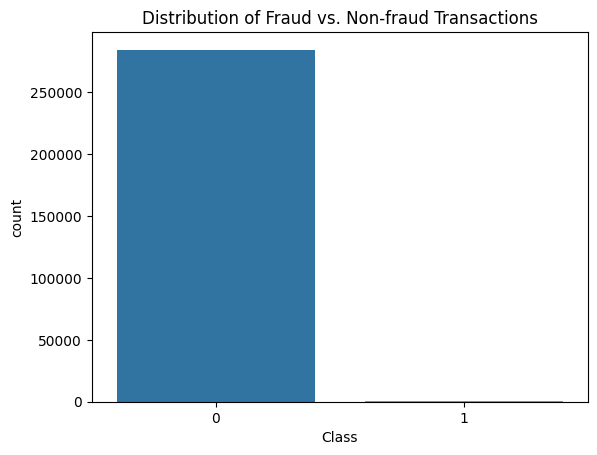

In [116]:
# Distribution of Fraud vs. Non-fraud Transactions
sns.countplot(x='Class', data=cleaned_data)
plt.title('Distribution of Fraud vs. Non-fraud Transactions')
plt.show()


The plot shows a highly imbalanced distribution with significantly little-to-no fraud transactions compared to non-fraud transactions.

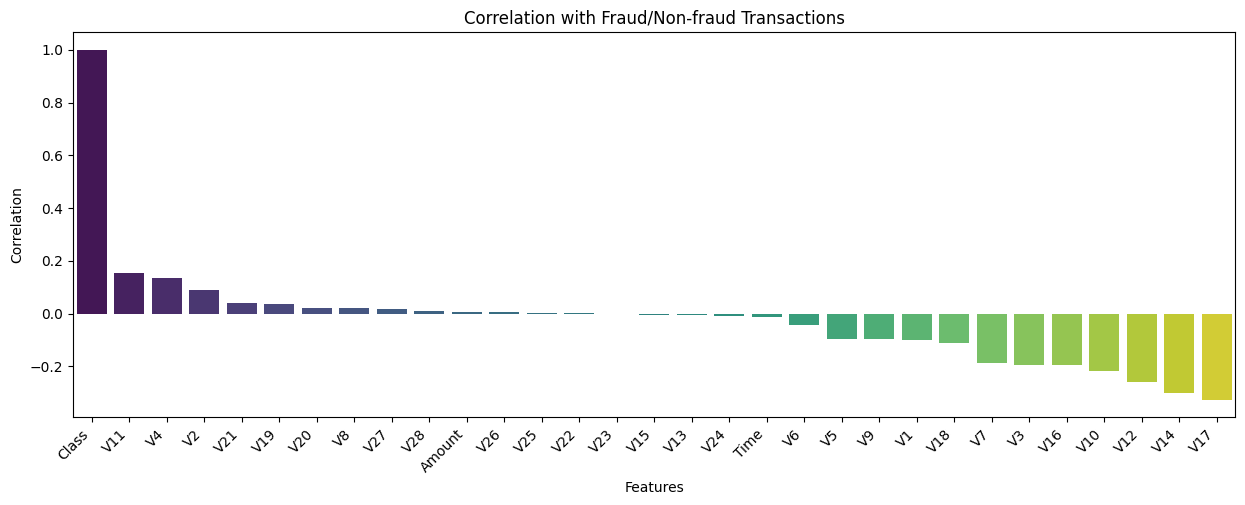

In [117]:
# Correlation Analysis
correlation_matrix = normalized_data.corr()
correlation_with_target = correlation_matrix['Class'].sort_values(ascending=False)

plt.figure(figsize=(15, 5))
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values, palette='viridis')
plt.title('Correlation with Fraud/Non-fraud Transactions')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45, ha='right')
plt.show()


Class has the highest positive correlation, while V17 has the highest negative correlation with the target variable 'Class'.

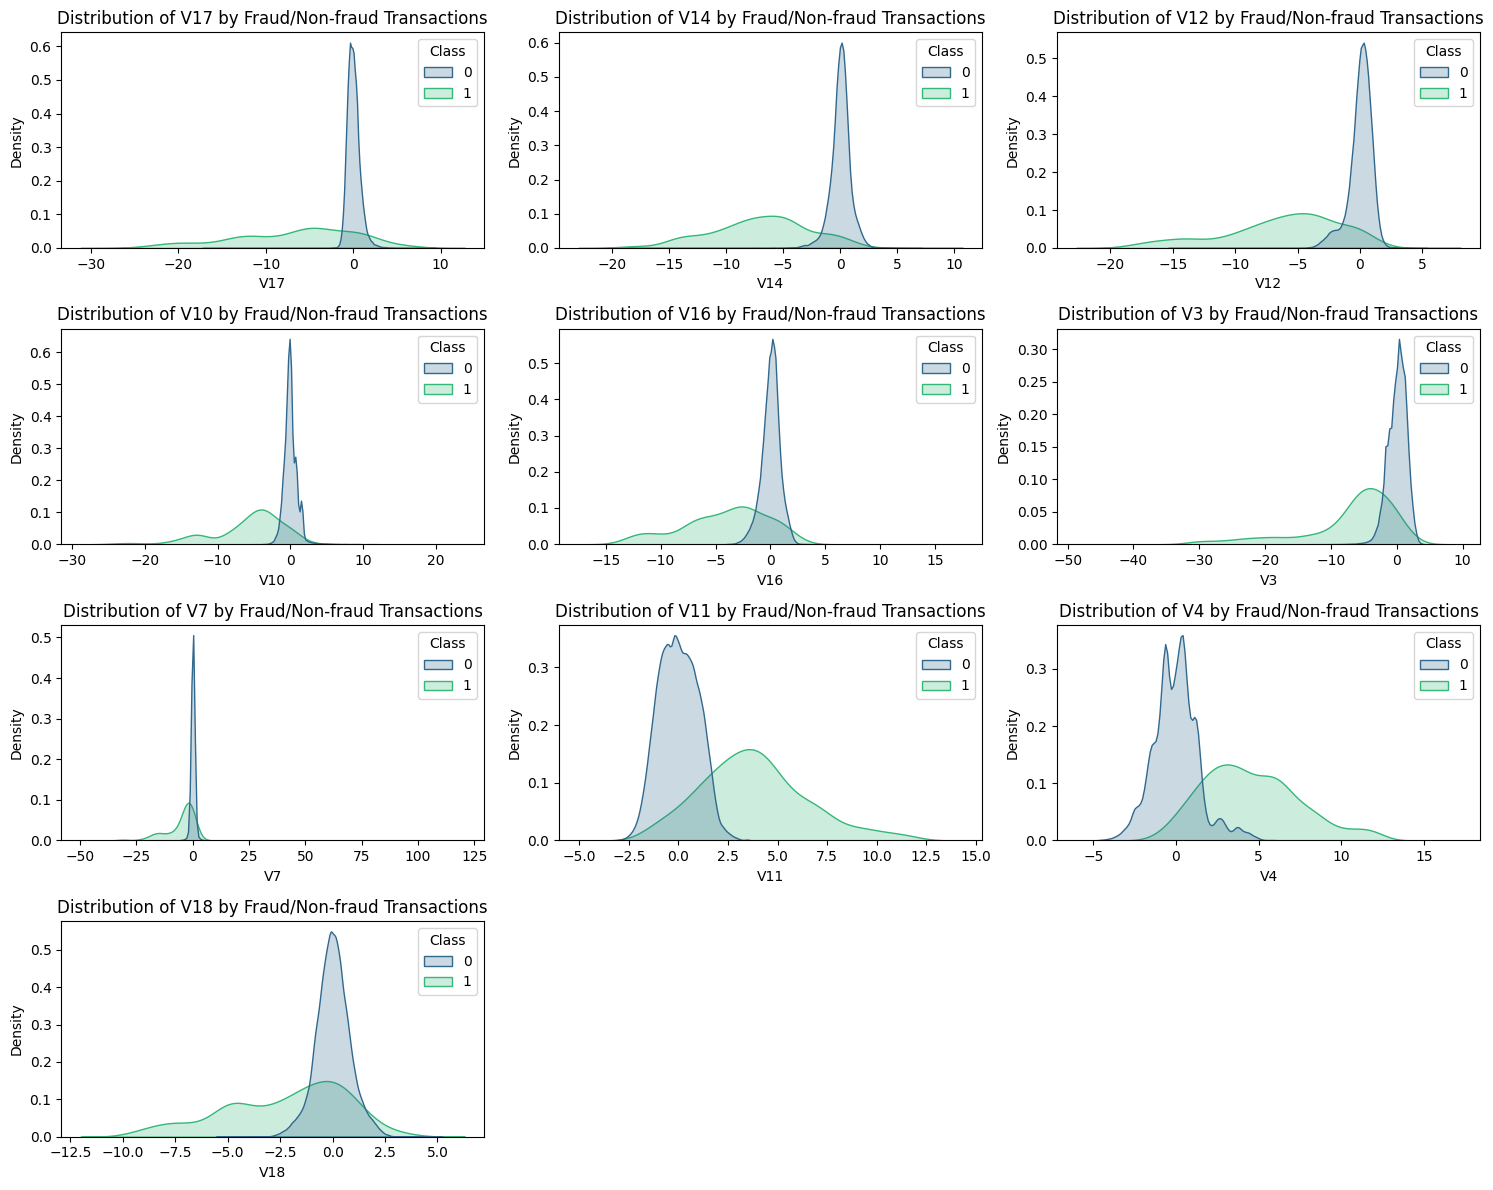

In [118]:
# Choose the top 10 features with the highest correlation (excluding 'Class' itself)
top_10_features = correlation_matrix['Class'].abs().nlargest(11)[1:].index

# Plot the distributions of the top 10 features against fraud/non-fraud transactions
plt.figure(figsize=(15, 12))
for i, feature in enumerate(top_10_features, 1):
    plt.subplot(4, 3, i)
    sns.kdeplot(data=cleaned_data, x=feature, hue='Class', fill=True, common_norm=False, palette='viridis')
    plt.title(f'Distribution of {feature} by Fraud/Non-fraud Transactions')

plt.tight_layout()
plt.show()


# ML Model Training and Testing Tasks

In [119]:
# Assuming 'Class' is the target variable
X = cleaned_data.drop('Class', axis=1)
y = cleaned_data['Class']

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [123]:
# Suppress ConvergenceWarnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Logistic Regression baseline model
baseline_model = LogisticRegression()

display(baseline_model)

# 5-fold cross-validation to train and predict on scaled data
y_pred_cv = cross_val_predict(baseline_model, X, y, cv=5, method='predict_proba')[:, 1]

# Train the model on the entire scaled training set
baseline_model.fit(X, y)

# Print the learned coefficients
coefficients = baseline_model.coef_[0]
print("\nLearned Coefficients (Weights):\n", coefficients)

# Comment on which feature the model gave higher weight to in the weight vector
max_weight_feature = X.columns[np.argmax(np.abs(coefficients))]
print("\nFeature with Highest Weight:", max_weight_feature)

y_pred_test = baseline_model.predict(X_test)

# Performance metrics
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

print("\nPerformance metrics\n")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


LogisticRegression()


Learned Coefficients (Weights):
 [-1.04219180e-04  7.30377597e-01 -6.70223591e-01 -6.29772643e-01
  1.34045711e-01  1.00777522e-01 -2.31748193e-02  9.43485338e-02
 -2.17531656e-01 -6.19040715e-01 -3.73793031e-01 -8.65280882e-02
 -1.29478121e-01 -4.11019276e-01 -1.13709044e+00 -2.25870864e-01
 -5.26224841e-01 -9.93505583e-01 -1.81772365e-01  1.27196141e-01
  4.44549763e-02  2.14282444e-01  2.30064729e-01  1.89515944e-02
 -1.84838149e-02 -1.48075859e-01  3.32921839e-02 -4.67973623e-02
  6.53145739e-02 -9.53266969e-03]

Feature with Highest Weight: V14

Performance metrics

Accuracy: 0.9988588883817282
Precision: 0.6701030927835051
Recall: 0.6632653061224489
F1-Score: 0.6666666666666666


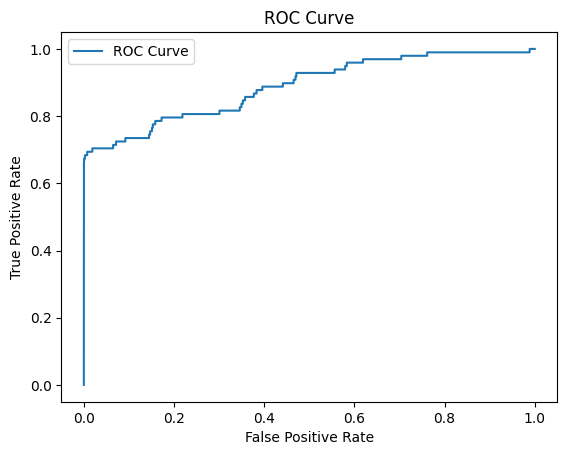

AUC: 0.8886271253718143
Accuracy after resampling: 0.9827253256557003
KNN Accuracy: 0.9983673326077034
SVM Accuracy: 0.9982795547909132

 KNN Performance metrics

Accuracy: 0.9983673326077034
Precision: 1.0
Recall: 0.05102040816326531
F1-Score: 0.09708737864077671

 SVM Performance metrics

Accuracy: 0.9982795547909132
Precision: 0.0
Recall: 0.0
F1-Score: 0.0


/Users/engr/venv/CSCN8010_classic_ml/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [132]:
# ROC Curve and AUC
y_probs = baseline_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

print("AUC:", roc_auc_score(y_test, y_probs))

## Class Imbalance Handling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train and evaluate the model after resampling
resampled_model = LogisticRegression()
resampled_model.fit(X_resampled, y_resampled)
y_resampled_pred = resampled_model.predict(X_test)
print("Accuracy after resampling:", accuracy_score(y_test, y_resampled_pred))

## Model Comparison
knn_model = KNeighborsClassifier()
svm_model = SVC()

# Train and evaluate KNN and SVM models
knn_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

y_knn_pred = knn_model.predict(X_test)
y_svm_pred = svm_model.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_knn_pred))
print("SVM Accuracy:", accuracy_score(y_test, y_svm_pred))

# Performance metrics
accuracy_k = accuracy_score(y_test, y_knn_pred)
precision_k = precision_score(y_test, y_knn_pred)
recall_k = recall_score(y_test, y_knn_pred)
f1_k = f1_score(y_test, y_knn_pred)

print("\n KNN Performance metrics\n")
print("Accuracy:", accuracy_k)
print("Precision:", precision_k)
print("Recall:", recall_k)
print("F1-Score:", f1_k)

accuracy_s = accuracy_score(y_test, y_svm_pred)
precision_s = precision_score(y_test, y_svm_pred)
recall_s = recall_score(y_test, y_svm_pred)
f1_s = f1_score(y_test, y_svm_pred)

print("\n SVM Performance metrics\n")
print("Accuracy:", accuracy_s)
print("Precision:", precision_s)
print("Recall:", recall_s)
print("F1-Score:", f1_s)
